<a href="https://colab.research.google.com/github/kentstephen/egypt_buildings/blob/main/egypt_buildings_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datashader --quiet

# We're going to connect to Source Cooperative with DuckDB to collect the building data and then we create a Pandas Dataframe so we can visualize
## Scroll to the bottom for the map

In [2]:
import duckdb
con = duckdb.connect()

con.sql("""
    install spatial;
    load spatial;
    install httpfs;
    load httpfs;
    set s3_region='us-west-2';

    create or replace table egypt (geom geometry);

    insert into egypt
    select ST_AsText(ST_Centroid(ST_GeomFromWKB(geometry))) AS geom
    FROM read_parquet('s3://us-west-2.opendata.source.coop/vida/google-microsoft-open-buildings/geoparquet/by_country/country_iso=EGY/EGY.parquet');
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [3]:
df = con.sql("""
    select
        ST_X(geom) AS longitude,
        ST_Y(geom) AS latitude
    from egypt;
""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [4]:
import datashader as ds
import pandas as pd
import colorcet

# Extract the longitude and latitude coordinates from the DataFrame
df['longitude'] = df['longitude']
df['latitude'] = df['latitude']

# Create a Datashader canvas
cvs = ds.Canvas(plot_width=690, plot_height=800)

# Aggregate the points on the canvas
agg = cvs.points(df, 'longitude', 'latitude')

# Apply shading to the aggregated points
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')

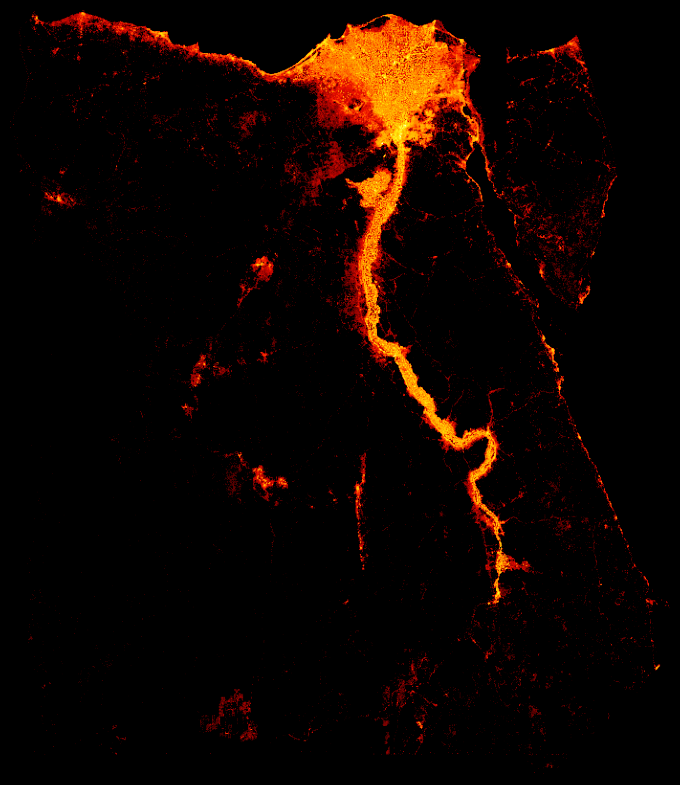

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import colorcet

# Create a Matplotlib colormap from the colorcet.fire colormap
fire_cmap = LinearSegmentedColormap.from_list("fire", colorcet.fire)

# Convert the Datashader image to a NumPy array
img_np = np.array(img.to_pil())

# Create a new figure with a black background
fig, ax = plt.subplots(figsize=(6.9, 8), facecolor='black')

# Display the image using Matplotlib with the custom 'fire' colormap
ax.imshow(img_np, cmap=fire_cmap)

# Remove the axis labels and ticks
ax.axis('off')

# Adjust the plot layout
plt.tight_layout()

# Display the figure
plt.show()

fatal: not a git repository (or any of the parent directories): .git
